In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install bayesian-optimization

In [ ]:

import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization
import lightgbm as lgb
import os, sys


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

In [ ]:
sub_sample = pd.read_csv('sample_submission.csv')
sub_sample.head()

,TargetId,Target
0,0_0,0
1,0_1,0
2,0_2,0
3,0_3,0
4,0_4,0


In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [ ]:
pd.set_option('display.max_columns', None)
print(train_df)

          RowId  IntersectionId   Latitude  Longitude  \
0       1921357               0  33.791659 -84.430032   
1       1921358               0  33.791659 -84.430032   
2       1921359               0  33.791659 -84.430032   
3       1921360               0  33.791659 -84.430032   
4       1921361               0  33.791659 -84.430032   
...         ...             ...        ...        ...   
856382  2777739            1990  39.938232 -75.149930   
856383  2777740            1990  39.938232 -75.149930   
856384  2777741            1990  39.938232 -75.149930   
856385  2777742            1990  39.938232 -75.149930   
856386  2777743            1990  39.938232 -75.149930   

                     EntryStreetName                ExitStreetName  \
0       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
1       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
2       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
3       Marietta Boulevard Northwes

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RowId                    856387 non-null  int64  
 1   IntersectionId           856387 non-null  int64  
 2   Latitude                 856387 non-null  float64
 3   Longitude                856387 non-null  float64
 4   EntryStreetName          848239 non-null  object 
 5   ExitStreetName           850100 non-null  object 
 6   EntryHeading             856387 non-null  object 
 7   ExitHeading              856387 non-null  object 
 8   Hour                     856387 non-null  int64  
 9   Weekend                  856387 non-null  int64  
 10  Month                    856387 non-null  int64  
 11  Path                     856387 non-null  object 
 12  TotalTimeStopped_p20     856387 non-null  float64
 13  TotalTimeStopped_p40     856387 non-null  float64
 14  Tota

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921357 entries, 0 to 1921356
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   RowId            int64  
 1   IntersectionId   int64  
 2   Latitude         float64
 3   Longitude        float64
 4   EntryStreetName  object 
 5   ExitStreetName   object 
 6   EntryHeading     object 
 7   ExitHeading      object 
 8   Hour             int64  
 9   Weekend          int64  
 10  Month            int64  
 11  Path             object 
 12  City             object 
dtypes: float64(2), int64(5), object(6)
memory usage: 190.6+ MB


In [ ]:
print ("Common columns between Train & Test datasets :", np.intersect1d(train_df.columns, test_df.columns).tolist())

Common columns between Train & Test datasets : ['City', 'EntryHeading', 'EntryStreetName', 'ExitHeading', 'ExitStreetName', 'Hour', 'IntersectionId', 'Latitude', 'Longitude', 'Month', 'Path', 'RowId', 'Weekend']


In [ ]:
print ("Columns in Train dataset only :", train_df.columns.symmetric_difference(test_df.columns).values )

Columns in Train dataset only : ['DistanceToFirstStop_p20' 'DistanceToFirstStop_p40'
 'DistanceToFirstStop_p50' 'DistanceToFirstStop_p60'
 'DistanceToFirstStop_p80' 'TimeFromFirstStop_p20' 'TimeFromFirstStop_p40'
 'TimeFromFirstStop_p50' 'TimeFromFirstStop_p60' 'TimeFromFirstStop_p80'
 'TotalTimeStopped_p20' 'TotalTimeStopped_p40' 'TotalTimeStopped_p50'
 'TotalTimeStopped_p60' 'TotalTimeStopped_p80']


In [ ]:
# Descriptive statistics of the "Total time stopped"
train_df[['TotalTimeStopped_p20','TotalTimeStopped_p40','TotalTimeStopped_p50',
          'TotalTimeStopped_p60','TotalTimeStopped_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalTimeStopped_p20,856387.0,1.755596,7.146549,0.0,0.0,0.0,0.0,298.0
TotalTimeStopped_p40,856387.0,5.403592,12.981674,0.0,0.0,0.0,0.0,375.0
TotalTimeStopped_p50,856387.0,7.722655,15.685910,0.0,0.0,0.0,10.0,375.0
TotalTimeStopped_p60,856387.0,11.925195,19.761325,0.0,0.0,0.0,18.0,377.0
TotalTimeStopped_p80,856387.0,22.948621,28.274091,0.0,0.0,16.0,34.0,763.0


In [ ]:
# Descriptive statistics of the "Time from first stop"
train_df[['TimeFromFirstStop_p20','TimeFromFirstStop_p40', 'TimeFromFirstStop_p50','TimeFromFirstStop_p60',
          'TimeFromFirstStop_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
TimeFromFirstStop_p20,856387.0,3.181096,11.835994,0.0,0.0,0.0,0.0,337.0
TimeFromFirstStop_p40,856387.0,9.162174,20.446568,0.0,0.0,0.0,0.0,356.0
TimeFromFirstStop_p50,856387.0,12.722165,24.219271,0.0,0.0,0.0,22.0,356.0
TimeFromFirstStop_p60,856387.0,18.926085,29.851797,0.0,0.0,0.0,31.0,357.0
TimeFromFirstStop_p80,856387.0,34.201656,41.130668,0.0,0.0,27.0,49.0,359.0


In [ ]:
# Descriptive statistics of the "•Distance to first stop"
train_df[['DistanceToFirstStop_p20','DistanceToFirstStop_p40', 'DistanceToFirstStop_p50','DistanceToFirstStop_p60',
 'DistanceToFirstStop_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceToFirstStop_p20,856387.0,6.765856,29.535968,0.0,0.0,0.0,0.00,1901.9
DistanceToFirstStop_p40,856387.0,20.285128,59.202108,0.0,0.0,0.0,0.00,2844.4
DistanceToFirstStop_p50,856387.0,28.837113,75.217343,0.0,0.0,0.0,53.10,2851.1
DistanceToFirstStop_p60,856387.0,44.272310,102.032250,0.0,0.0,0.0,64.20,3282.4
DistanceToFirstStop_p80,856387.0,83.991313,160.709797,0.0,0.0,60.4,85.95,4079.2


In [ ]:
# Averages per City based on 50 & 80 percentile
train_df.groupby('City').agg({'TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'})

,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
City,,,,,,
Atlanta,9.736069,15.231519,30.860906,28.911256,41.621201,105.185034
Boston,8.603812,13.225124,23.460217,25.922292,35.435076,62.671911
Chicago,7.141947,11.433159,24.727496,21.380041,31.045220,69.869600
Philadelphia,6.706976,11.918583,31.866747,19.723289,31.721877,89.993218


# Data Cleaning

In [ ]:
train_df.nunique()

,0
RowId,856387
IntersectionId,2559
Latitude,4799
Longitude,4804
EntryStreetName,1723
ExitStreetName,1703
EntryHeading,8
ExitHeading,8
Hour,24
Weekend,2


In [ ]:
print(train_df["City"].unique())
print(test_df["City"].unique())

['Atlanta' 'Boston' 'Chicago' 'Philadelphia']
['Atlanta' 'Boston' 'Chicago' 'Philadelphia']


In [ ]:
test_df.isna().sum(axis=0)

,0
RowId,0
IntersectionId,0
Latitude,0
Longitude,0
EntryStreetName,19198
ExitStreetName,15587
EntryHeading,0
ExitHeading,0
Hour,0
Weekend,0


In [ ]:
train_df.isnull().sum()

,0
RowId,0
IntersectionId,0
Latitude,0
Longitude,0
EntryStreetName,8148
ExitStreetName,6287
EntryHeading,0
ExitHeading,0
Hour,0
Weekend,0


- There are missing values in the column EntryStreetName and ExitStreetName. We therefor drop rows with missing street names

In [ ]:
train_df_clean = train_df.dropna(subset=['EntryStreetName', 'ExitStreetName'])
train_df_clean.isnull().sum().sum()

0

In [ ]:
train_df_clean.isnull().sum()

,0
RowId,0
IntersectionId,0
Latitude,0
Longitude,0
EntryStreetName,0
ExitStreetName,0
EntryHeading,0
ExitHeading,0
Hour,0
Weekend,0


In [ ]:
# For columns  EntryHeading, ExitHeading, City, convert them to categorical
train_df_clean['EntryHeading'].astype('category')
train_df_clean['ExitHeading'].astype('category')
train_df_clean['City'].astype('category')
train_df_clean.dtypes

,0
RowId,int64
IntersectionId,int64
Latitude,float64
Longitude,float64
EntryStreetName,object
ExitStreetName,object
EntryHeading,object
ExitHeading,object
Hour,int64
Weekend,int64


# EDA

In [ ]:
# Basic descriptive statistics of numeric columns
train_df_clean.describe()

,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,8.424520e+05,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000
mean,2.351367e+06,837.150963,39.643732,-77.897480,12.430385,0.278895,9.104089,1.712640,5.315217,7.614452,11.787859,22.766657,3.113625,9.041365,12.583435,18.765524,34.003984,6.665580,20.157423,28.726120,44.218243,84.084817
std,2.467677e+05,655.732079,2.915619,5.951687,6.077999,0.448456,1.991233,7.028749,12.817806,15.507983,19.557800,28.033040,11.679443,20.270912,24.041641,29.667963,40.930126,29.482647,59.352436,75.467894,102.451157,161.351305
min,1.921357e+06,0.000000,33.649973,-87.862288,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.138701e+06,292.000000,39.937602,-84.387454,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.351786e+06,685.000000,39.984711,-75.174634,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,60.400000
75%,2.564918e+06,1268.000000,41.910407,-75.099312,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,18.000000,34.000000,0.000000,0.000000,21.000000,31.000000,48.000000,0.000000,0.000000,52.900000,64.100000,85.800000
max,2.777743e+06,2875.000000,42.381782,-71.025550,23.000000,1.000000,12.000000,298.000000,375.000000,375.000000,377.000000,763.000000,337.000000,356.000000,356.000000,357.000000,359.000000,1901.900000,2844.400000,2851.100000,3282.400000,4079.200000


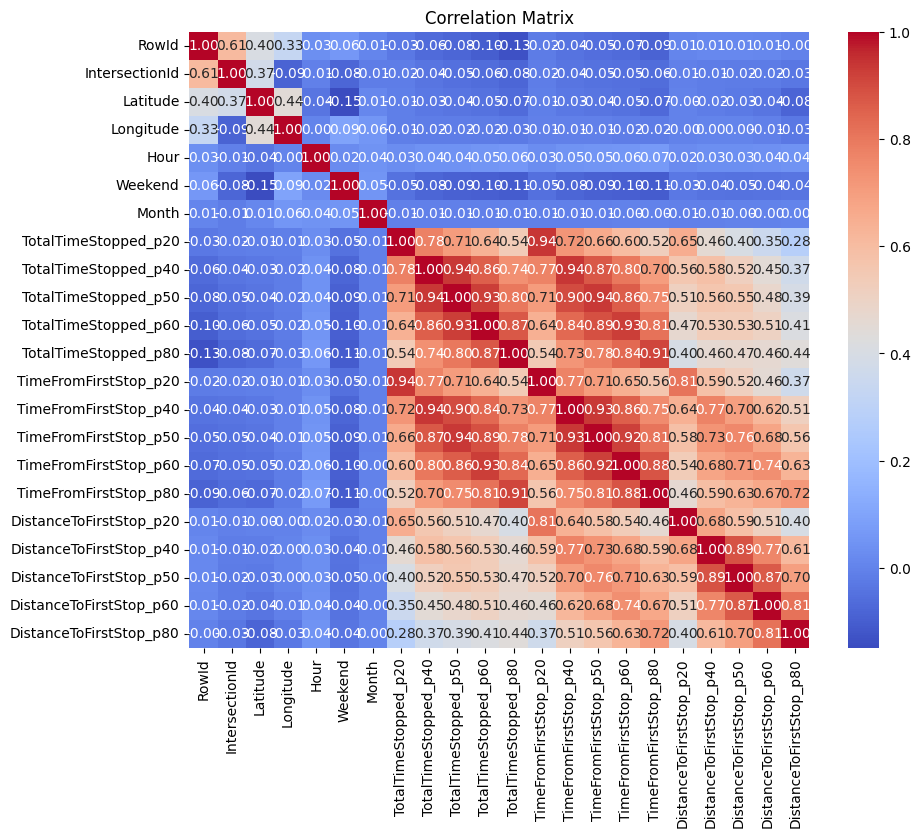

In [ ]:
# Check correlation between features
# Select only numerical columns from the DataFrame
numerical_columns = train_df_clean.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix on numerical columns
correlation = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Visualizes how TotalTimeStopped varies by Hour and Weekend status to find traffic patterns.**

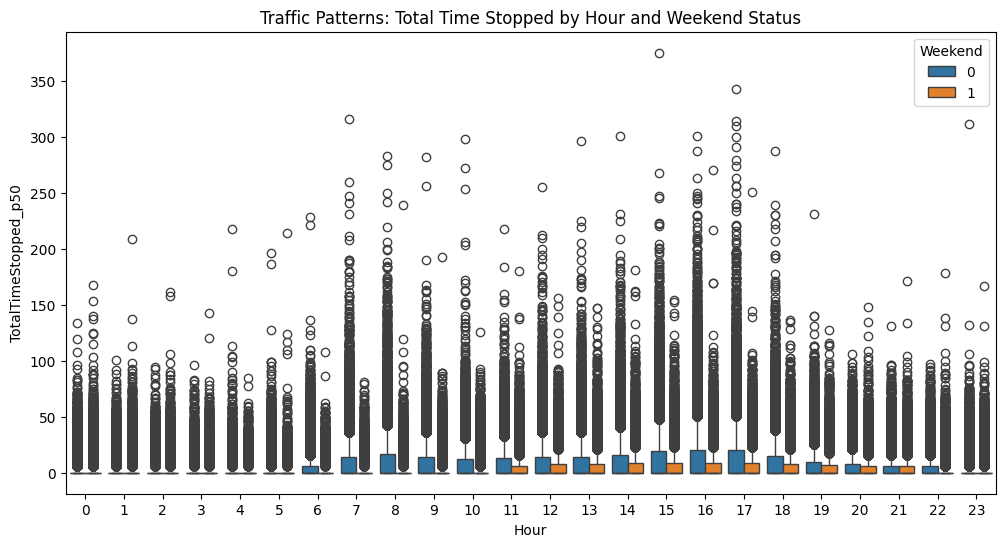

In [ ]:
# traffic patterns by hour and weekend status
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df_clean, x='Hour', y='TotalTimeStopped_p50', hue='Weekend')
plt.title('Traffic Patterns: Total Time Stopped by Hour and Weekend Status')
plt.show()

**Show the distribution of data across the four cities in the dataset.**

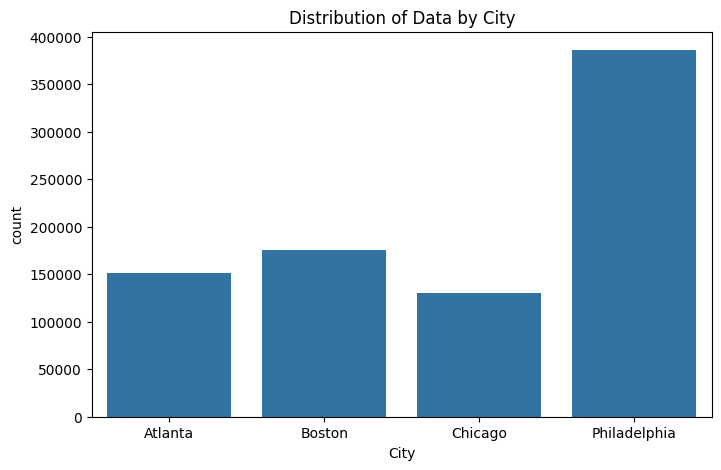

In [ ]:
# Countplot for city distribution in training data
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df_clean, x='City')
plt.title('Distribution of Data by City')
plt.show()

**Philadelphia seems to have the most data**

**Let's explore the relationship between TotalTimeStopped_p50 and DistanceToFirstStop_p50.**

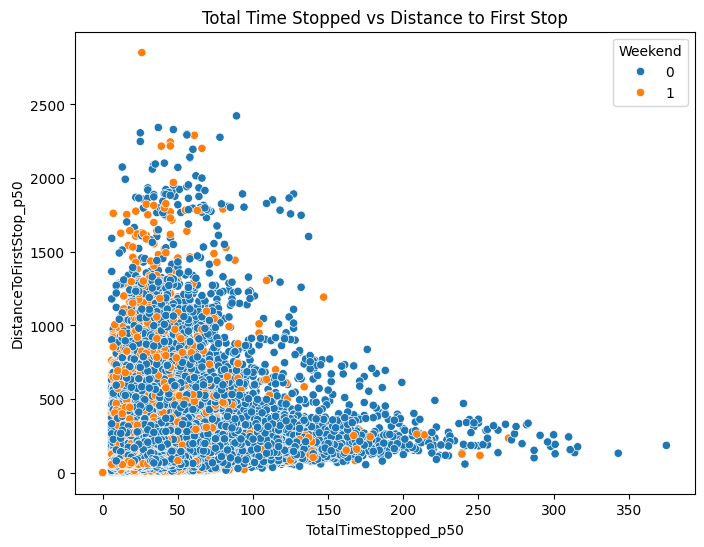

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df_clean, x='TotalTimeStopped_p50', y='DistanceToFirstStop_p50', hue='Weekend')
plt.title('Total Time Stopped vs Distance to First Stop')
plt.show()

I don't seem to see a distinct relationship between the two variables

**Let us view how categorical variables: city and weekend impact the TotalTimeStopped and Distance to first Stopped**

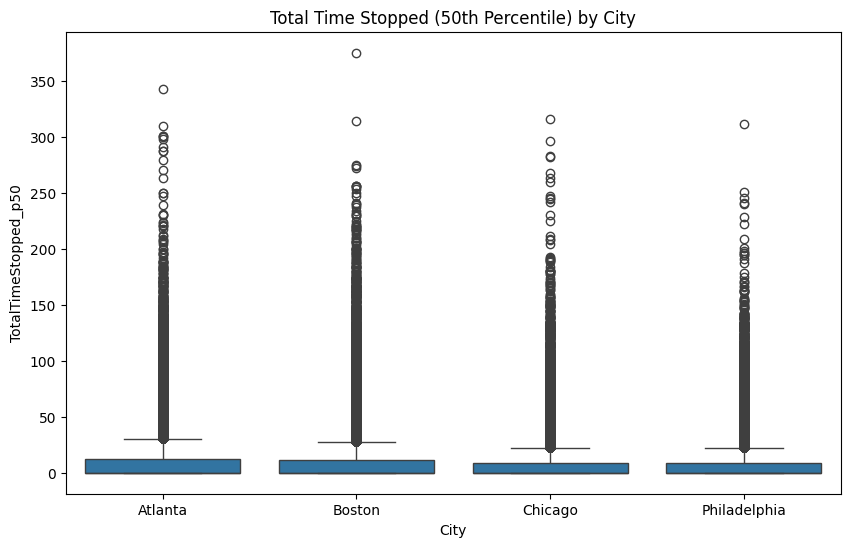

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df_clean, x='City', y='TotalTimeStopped_p50')
plt.title('Total Time Stopped (50th Percentile) by City')
plt.show()

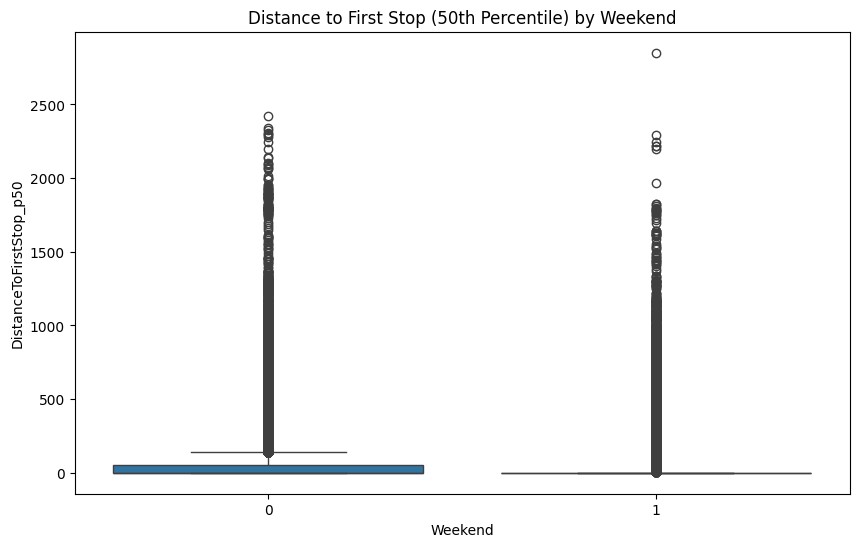

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df_clean, x='Weekend', y='DistanceToFirstStop_p50')
plt.title('Distance to First Stop (50th Percentile) by Weekend')
plt.show()

**Because we have latitudes and longitudes, we can visualize the data on a map/geographical scatter plot to see distributions on the intersections on a map**

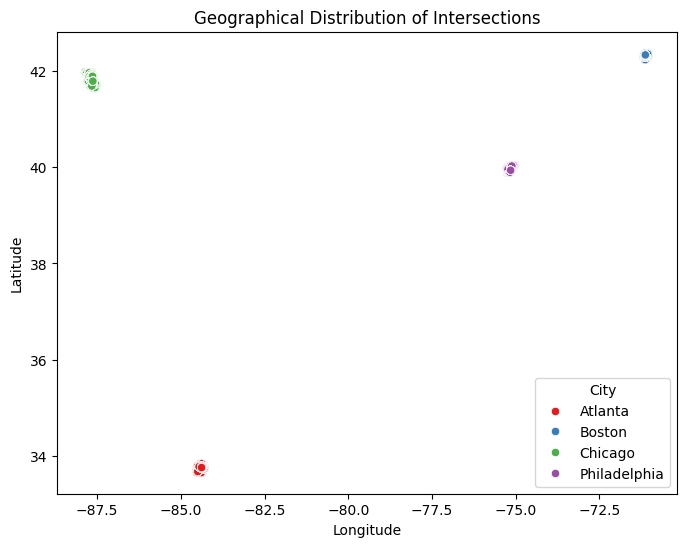

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df_clean, x='Longitude', y='Latitude', hue='City', palette='Set1')
plt.title('Geographical Distribution of Intersections')
plt.show()

**Explore how traffic congestion varies by hour of the day.**

<ipython-input-39-1338ab1b9b65>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='TotalTimeStopped_p50', data=hourly_congestion, palette='coolwarm')


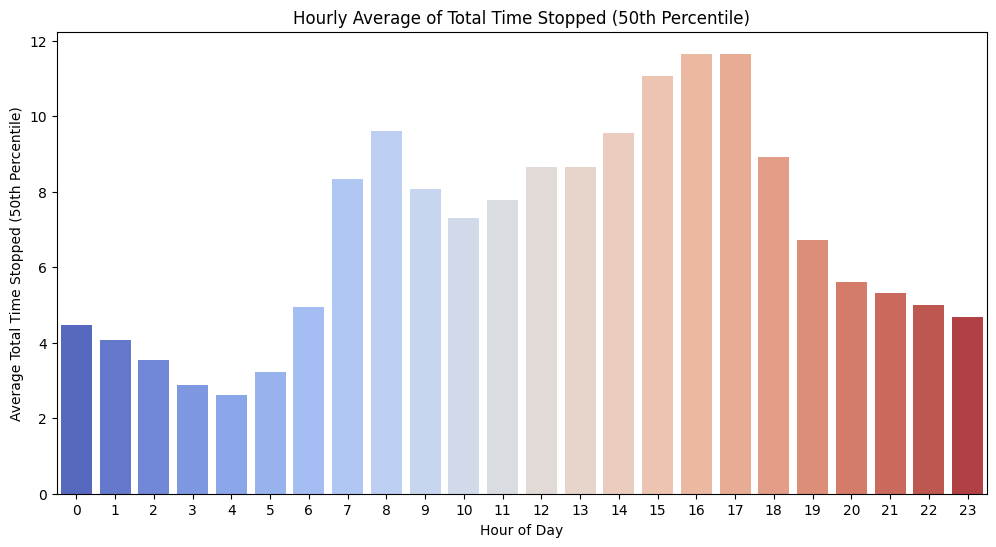

In [ ]:
# Group by hour and calculate the mean
hourly_congestion = train_df_clean.groupby('Hour')['TotalTimeStopped_p50'].mean().reset_index()

# Plot using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='TotalTimeStopped_p50', data=hourly_congestion, palette='coolwarm')
plt.title('Hourly Average of Total Time Stopped (50th Percentile)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Time Stopped (50th Percentile)')
plt.show()

**Traffic congestion seems to peek at afternoon to evening hours and also between 7 and 9 morning hours. These could be because these are hours people go to work and leave work**

# Hypotheses Testing

Is our data normally distributed or not so that we can know which test to use.

<ipython-input-40-c96d76443cbb>:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


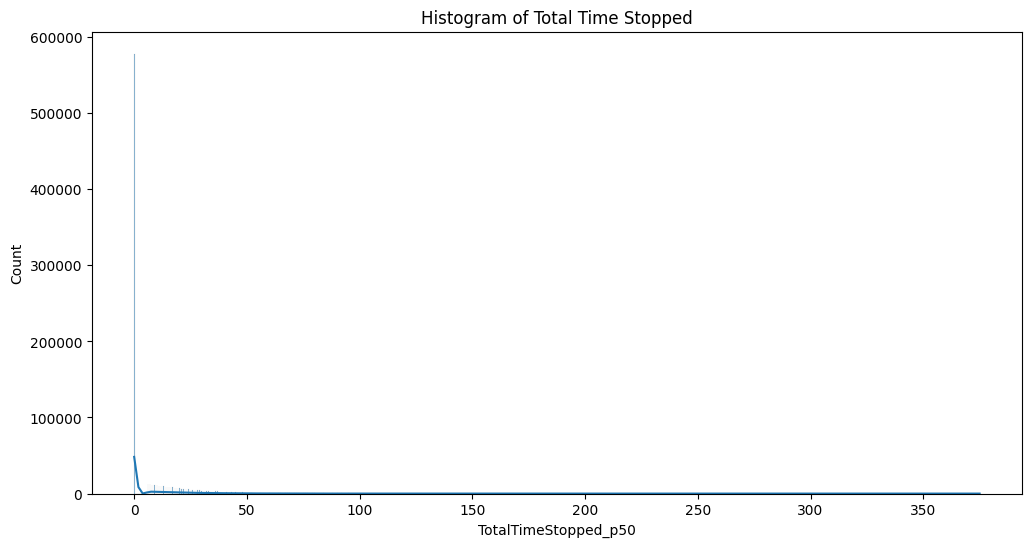

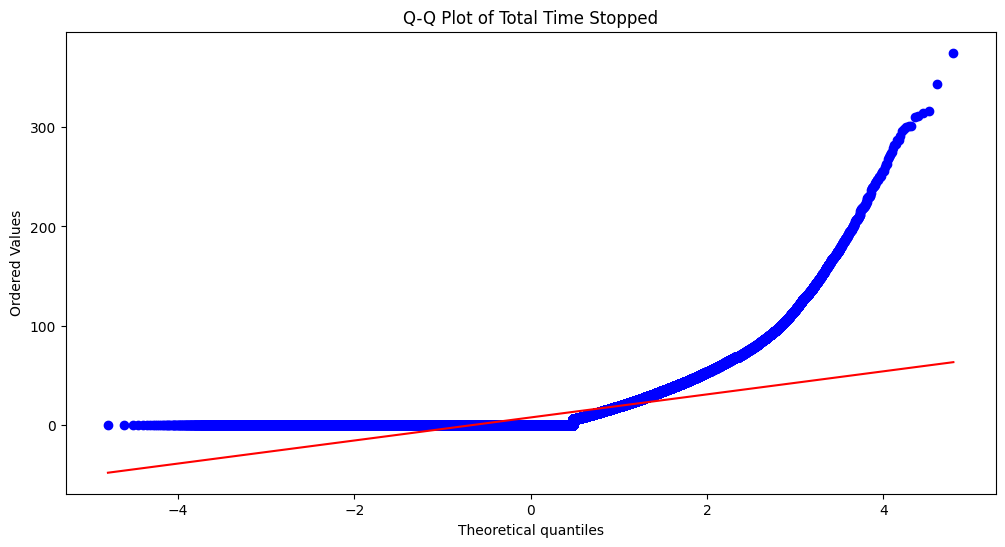

In [ ]:
# check visually
# Histogram
with pd.option_context('mode.use_inf_as_na', True):
    plt.figure(figsize=(12, 6))
    sns.histplot(train_df_clean['TotalTimeStopped_p50'], kde=True)
    plt.title('Histogram of Total Time Stopped')
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(12, 6))
    stats.probplot(train_df_clean['TotalTimeStopped_p50'], dist="norm", plot=plt)
    plt.title('Q-Q Plot of Total Time Stopped')
    plt.show()

**Visually it seems not to be a normal distribution. LEt us further use a statistical test to second or visual analysis. We will use a Shapiro-Wilk Test and a  Kolmogorov-Smirnov Test where when we get a p-value of lower than 0.05 we will reject our null hypotheses which is the data is normally distributed**

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(train_df_clean['TotalTimeStopped_p50'])
print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')
if p_value < 0.05:
    print("Data is not normally distributed")
else:
    print("Data is normally distributed")

Shapiro-Wilk Test: Statistics=0.5613500837621241, p-value=1.1526008036983287e-203
Data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 842452.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import kstest

stat, p_value = kstest(train_df_clean['TotalTimeStopped_p50'], 'norm', args=(train_df_clean['TotalTimeStopped_p50'].mean(), train_df_clean['TotalTimeStopped_p50'].std()))
print(f'Kolmogorov-Smirnov Test: Statistics={stat}, p-value={p_value}')
if p_value < 0.05:
    print("Data is not normally distributed")
else:
    print("Data is normally distributed")

Kolmogorov-Smirnov Test: Statistics=0.37413429826536004, p-value=0.0
Data is not normally distributed


**We confirm that we have a non-normal distributed data**

## Hypotheses 1

**Hypothesis 1: There is a significant difference in total time stopped on weekends vs. weekdays.**

Since our data is not a normal distribution for our first hypotheses we will use a **Mann-Whitney U test**

In [ ]:
from scipy.stats import mannwhitneyu

# Separate data into weekends and weekdays
weekend_data = train_df_clean[train_df_clean['Weekend'] == 1]['TotalTimeStopped_p50']
weekday_data = train_df_clean[train_df_clean['Weekend'] == 0]['TotalTimeStopped_p50']

# Since data is not normal, we will do a  Mann-Whitney U test
u_stat, p_val_mannwhitney = mannwhitneyu(weekend_data, weekday_data)

# Print results
print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_val_mannwhitney}")

Mann-Whitney U test: U-statistic = 64075342413.0, p-value = 0.0


**Given we get a p-value lower than 0.05, we reject the null hypothesis and conclude that there is a significant difference in total time stopped on weekends vs. weekdays.**

## Hypotheses 2

****Hypothesis 2: The direction (EntryHeading or ExitHeading) affects total time stopped.****

In [ ]:
# To compare means we will use ANOVA
from scipy.stats import f_oneway

# Group data by EntryHeading and calculate total time stopped
grouped_by_entry = train_df_clean.groupby('EntryHeading')['TotalTimeStopped_p50'].apply(list)

# Perform ANOVA
f_stat, p_val_anova = f_oneway(*grouped_by_entry)

print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_val_anova}")

ANOVA: F-statistic = 170.1745826942054, p-value = 8.477068904200256e-253


**We find that our p-value is below the threshold 0.05, so we reject the null hypothesis and conclude that direction impacts the total time stopped.**

## Hypotheses 3

**Hypothesis 3: The average total time stopped varies significantly between cities.**

In [ ]:
# We will again use ANOVA
# Group data by City and calculate total time stopped
grouped_by_city = train_df_clean.groupby('City')['TotalTimeStopped_p50'].apply(list)

# Perform ANOVA
f_stat_city, p_val_anova_city = f_oneway(*grouped_by_city)

print(f"ANOVA by City: F-statistic = {f_stat_city}, p-value = {p_val_anova_city}")

ANOVA by City: F-statistic = 1630.5273643183332, p-value = 0.0


**P_value is below 0.05 indicating that we reject  null hypotheses hence indicating that mean total time stopped differs across the cities.**

# Modelling

In [ ]:
train_df_clean.dtypes

,0
RowId,int64
IntersectionId,int64
Latitude,float64
Longitude,float64
EntryStreetName,object
ExitStreetName,object
EntryHeading,object
ExitHeading,object
Hour,int64
Weekend,int64


Features to be used in modeling

In [ ]:

features = ['IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName', 'ExitStreetName', 'EntryHeading',
            'ExitHeading','Hour', 'Weekend','Month','Path','City']

_df_train = train_df_clean[features]
_df_test = test_df[features]

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding

Create LabelEncoder objec

In [ ]:

le = LabelEncoder()

columns_to_encode = ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'City', 'Path']


for col in columns_to_encode:
    _df_train[col] = le.fit_transform(_df_train[col].astype(str))

categorical_columns = _df_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    _df_train[col] = le.fit_transform(_df_train[col].astype(str))

print(_df_train.head())

<ipython-input-48-b618afd4c25c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_train[col] = le.fit_transform(_df_train[col].astype(str))  # NaN veya boş değerler varsa str'ye çevirir
<ipython-input-48-b618afd4c25c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_train[col] = le.fit_transform(_df_train[col].astype(str))  # NaN veya boş değerler varsa str'ye çevirir
<ipython-input-48-b618afd4c25c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

   IntersectionId   Latitude  Longitude  EntryStreetName  ExitStreetName  \
0               0  33.791659 -84.430032              732             717   
1               0  33.791659 -84.430032              732             717   
2               0  33.791659 -84.430032              732             717   
3               0  33.791659 -84.430032              732             717   
4               0  33.791659 -84.430032              732             717   

   EntryHeading  ExitHeading  Hour  Weekend  Month  Path  City  
0             3            3     0        0      6  5526     0  
1             5            5     0        0      6  5537     0  
2             3            3     1        0      6  5526     0  
3             5            5     1        0      6  5537     0  
4             3            3     2        0      6  5526     0  


<ipython-input-48-b618afd4c25c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_train[col] = le.fit_transform(_df_train[col].astype(str))  # NaN veya boş değerler varsa str'ye çevirir


Create LabelEncoder object

In [ ]:

le = LabelEncoder()


columns_to_encode = ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'City', 'Path']


for col in columns_to_encode:
    _df_test[col] = le.fit_transform(_df_test[col].astype(str))

categorical_columns = _df_test.select_dtypes(include=['object']).columns
for col in categorical_columns:
    _df_test[col] = le.fit_transform(_df_test[col].astype(str))


print(_df_test.head())

<ipython-input-55-a5f5f2310c7e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_test[col] = le.fit_transform(_df_test[col].astype(str))  # NaN veya boş değerler varsa str'ye çevirir
<ipython-input-55-a5f5f2310c7e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_test[col] = le.fit_transform(_df_test[col].astype(str))  # NaN veya boş değerler varsa str'ye çevirir
<ipython-input-55-a5f5f2310c7e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

   IntersectionId  Latitude  Longitude  EntryStreetName  ExitStreetName  \
0               1  33.75094 -84.393032             1266            1268   
1               1  33.75094 -84.393032             1266             951   
2               1  33.75094 -84.393032             1266            1268   
3               1  33.75094 -84.393032             1266            1268   
4               1  33.75094 -84.393032             1266            1268   

   EntryHeading  ExitHeading  Hour  Weekend  Month   Path  City  
0             2            2     0        0      6  11255     0  
1             6            5     0        0      6  11262     0  
2             6            6     0        0      6  11263     0  
3             2            2     1        0      6  11255     0  
4             6            6     1        0      6  11263     0  


<ipython-input-55-a5f5f2310c7e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_test[col] = le.fit_transform(_df_test[col].astype(str))  # NaN veya boş değerler varsa str'ye çevirir


In [ ]:
_df_train.dtypes

,0
IntersectionId,int64
Latitude,float64
Longitude,float64
EntryStreetName,int64
ExitStreetName,int64
EntryHeading,int64
ExitHeading,int64
Hour,int64
Weekend,int64
Month,int64


In [ ]:
_df_test.dtypes

,0
IntersectionId,int64
Latitude,float64
Longitude,float64
EntryStreetName,int64
ExitStreetName,int64
EntryHeading,int64
ExitHeading,int64
Hour,int64
Weekend,int64
Month,int64


We can improve the performance of the models by standardization. These are methods such as" Normalize"," MinMax"," Robust" and "Scale" that can be used for standardization

In [ ]:
scaler = StandardScaler().fit(_df_train)
df_train_scaled = scaler.transform(_df_train)
df_test_scaled = scaler.transform(_df_test)

We create PCA and plot variance explained

Text(0.5, 0, 'PCA feature')

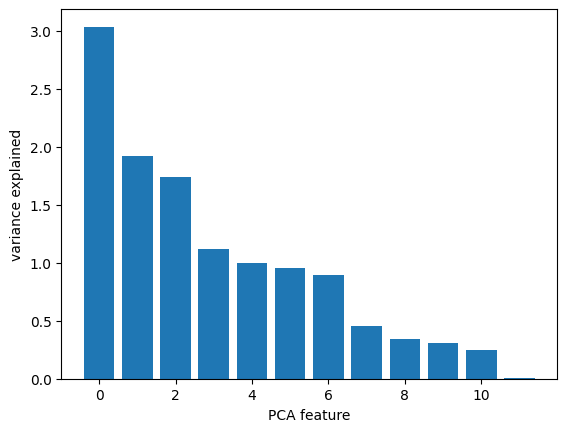

In [ ]:

pca = PCA()
pca.fit_transform(df_train_scaled)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.ylabel('variance explained')
plt.xlabel('PCA feature')

Create a pca dataframe based on 90% explained variance retained

In [ ]:

pca = PCA(n_components=.90).fit(df_train_scaled)
pca_train = pca.transform(df_train_scaled)
pca_test = pca.transform(df_test_scaled)
col_lst = []
for i in range(0,pca_train.shape[1]):
    col_lst.append(f'PC{i}')

df_pca_train = pd.DataFrame(pca_train,columns=col_lst)
df_pca_test = pd.DataFrame(pca_test,columns=col_lst)
df_pca_train.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.591607,-2.639716,0.607073,-1.937097,-1.704908,0.002423,-0.238307,0.460655
1,-1.627133,-2.295267,1.642683,-1.958127,-1.709417,-0.002393,-0.178525,0.487520
2,-1.592102,-2.639638,0.610849,-1.871574,-1.579016,-0.071865,-0.273707,0.449017
3,-1.627628,-2.295188,1.646460,-1.892605,-1.583526,-0.076681,-0.213925,0.475882
4,-1.592596,-2.639559,0.614626,-1.806052,-1.453125,-0.146152,-0.309107,0.437378


Trying both the scaled & PCA data to see if we can maintain good accuracy level with less features

In [ ]:

X = df_train_scaled
X_pca = df_pca_train
y = train_df_clean[['TotalTimeStopped_p20','TotalTimeStopped_p50','TotalTimeStopped_p80',
     'DistanceToFirstStop_p20','DistanceToFirstStop_p50','DistanceToFirstStop_p80']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

Create function to run different models and return rmse

In [ ]:

def modeling(X_train, X_test, y_train, y_test):
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('DT', DecisionTreeRegressor(random_state = 1)))
    models.append(('RF', RandomForestRegressor(random_state = 1)))
    models.append(('GB', MultiOutputRegressor(GradientBoostingRegressor(random_state = 1))))



    names = []
    rmses = []

    for name, model in models:

        model.fit (X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error (y_test, y_pred)
        rmse = np.sqrt(mse)
        print (f'{name} : mse {mse} - rmse {rmse}')
        names.append(name)
        rmses.append(rmse)
    return names, rmses

Run modeling function on scaled data

In [ ]:

print ("Scaled Data Modeling :")
names, rmses = modeling (X_train, X_test, y_train, y_test)

Scaled Data Modeling :
LR : mse 5565.769392978463 - rmse 74.60408429153502
KNN : mse 4830.861906259786 - rmse 69.50440206389655
DT : mse 3134.463508694178 - rmse 55.98627964684007
RF : mse 1906.492702188375 - rmse 43.66340232034575
GB : mse 4752.9855407044315 - rmse 68.94189974684794


If we compare the result , we need to use RF

In [ ]:
print ("PCA Data Modeling :")
pca_names, pca_rmses = modeling (X_train_pca, X_test_pca, y_train_pca, y_test_pca)

PCA Data Modeling :
LR : mse 5572.586894434481 - rmse 74.64976151625993
KNN : mse 5463.777336206277 - rmse 73.91736829870418
DT : mse 6191.4496354562625 - rmse 78.68576513865938


KeyboardInterrupt: 

Since RF performed the best in our initial testing, we will start by trying to tune the RF paramters

In [ ]:
rf_params = {}

In [ ]:
rf_model = RandomForestRegressor(random_state = 1)

In [ ]:
rf_cv = GridSearchCV(rf_model,
                    rf_params,
                    cv = 3).fit(X_train, y_train)

In [ ]:
rf_cv.best_params_

{}

In [ ]:
rf_tuned = rf_cv.best_estimator_
y_pred = rf_tuned.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
print ('mse :', rf_mse)
print ('rmse :', rf_rmse)

mse : 1906.492702188375
rmse : 43.66340232034575


In [ ]:
rf_pred = rf_tuned.predict(df_test_scaled)

In [ ]:
rf_submission = pd.DataFrame (rf_pred, columns=range(0,6)).reset_index()
rf_submission = rf_submission.melt(id_vars='index', value_vars=range(0,6), value_name='Target')
rf_submission['TargetId'] = rf_submission['index'].astype(str) + '_' + rf_submission['variable'].astype(str)
rf_submission.sort_values(['index','variable'], inplace=True)

In [ ]:
sample = pd.read_csv("sample_submission.csv")
sample.shape

In [ ]:
rf_results = rf_submission.merge(sample[['TargetId']], on='TargetId', how='inner')
rf_results.shape

In [ ]:
rf_results[['TargetId','Target']].to_csv('rf_submission.csv', index=False)